In [11]:
pip install pandas textblob matplotlib seaborn nltk


Note: you may need to restart the kernel to use updated packages.


In [12]:
# exploring VADER(VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
# Roberta Pretrained Model from
# Huggingface Pipeline

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('averaged_perceptron_tagger_eng')  # For NLTK v3.8+


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ANKIT KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [14]:
# Read data
df = pd.read_csv(r'C:\Users\ANKIT KUMAR\Downloads\archive\Reviews.csv')

In [15]:
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


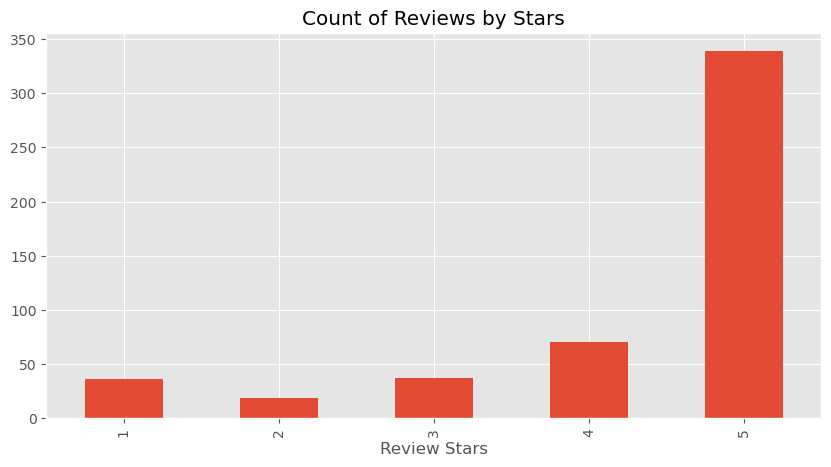

In [17]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [18]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [19]:
tokens = nltk.word_tokenize(example)
print(tokens[:10])

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [20]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [21]:
import nltk

nltk.download('maxent_ne_chunker_tab')   # Newer NLTK naming
nltk.download('words')                   # Needed for NE chunker’s word list

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\ANKIT KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to C:\Users\ANKIT
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [22]:
# This was basic NLTK for sentiment analysis and now, we improve this by using VADER
# many lines got issues due to ntlk version mismatch and so, to avaoid lookup error in future
#load these beforehand, a standard bootstrap cell for the project  


# import nltk
# Tokenization & stopwords
#nltk.download('punkt')
#nltk.download('stopwords')
# POS tagging
#nltk.download('averaged_perceptron_tagger_eng')
# Named entity recognition
#nltk.download('maxent_ne_chunker_tab')
#nltk.download('words')


In [23]:
# VADER 
#bundled with NLTK to assess the emotional tone of text. The three scores it outputs — neg, neu, and pos — represent the proportion of the text that is negative, neutral, or positive.

In [24]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
print("NLTK + VADER setup complete.")

NLTK + VADER setup complete.


[nltk_data] Downloading package vader_lexicon to C:\Users\ANKIT
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
sia.polarity_scores('I am so happy!')
# get's the proportion of negative,neutral,positive and normalized overall score of the sentence

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [26]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [27]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [28]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [30]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [31]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


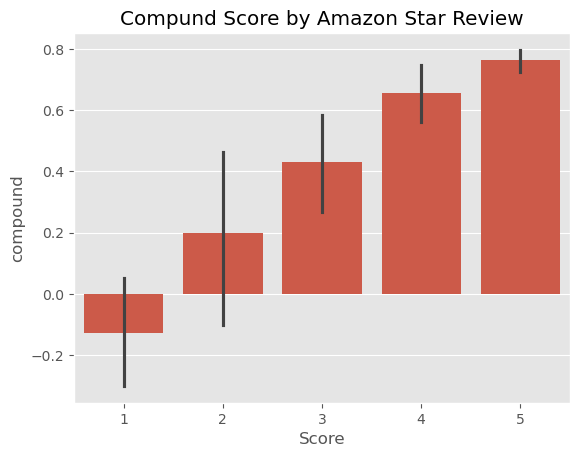

In [32]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

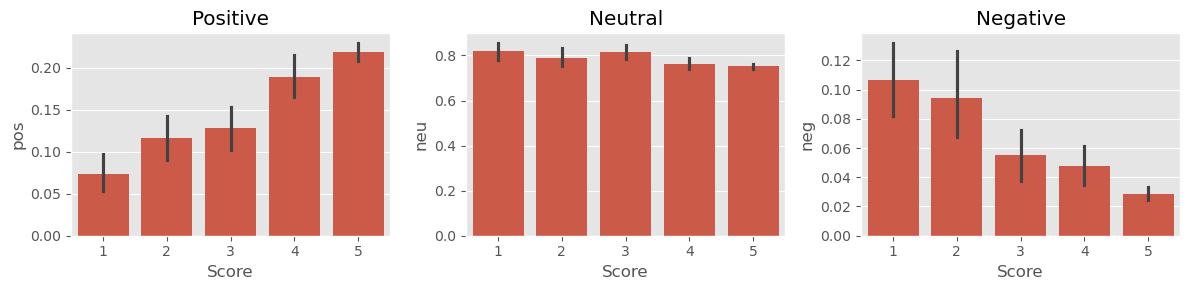

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [34]:
# Now, trying Roberta Pretrained Model
# We are exploring various models and pretrained pipelines for gathering data about the metrics of accuracy and performance
# Use a model trained of a large corpus of data.
#Transformer model accounts for the words but also the context related to other words.

In [35]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [38]:
import importlib
import sys
import subprocess

def pip_install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

required = [
    ("transformers", "transformers"),
    ("scipy", "scipy")
]

for module_name, package_name in required:
    if importlib.util.find_spec(module_name) is None:
        print(f"Installing {package_name} ...")
        pip_install(package_name)
    else:
        print(f"{package_name} is already installed.")

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

print("Environment ready.")


transformers is already installed.
scipy is already installed.
Environment ready.


In [39]:
!pip install --no-cache-dir --prefer-binary \
  torch --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
   ---------------------------------------- 0.0/619.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/619.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/619.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/619.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/619.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/619.4 MB 1.2 MB/s eta 0:08:54
   ---------------------------------------- 1.0/619.4 MB 1.2 MB/s eta 0:08:31
   ---------------------------------------- 1.0/619.4 MB 1.2 MB/s eta 0:08:31
   ---------------------------------------- 1.3/619.4 MB 1.2 MB/s eta 0:08:45
   ---------------------------------------- 1.3/619.4 MB 1.2 MB/s eta 0:08:45
   ---------------------------------------- 1.6/619.4 MB 1.0 MB/s eta 0:10:18
   ---------------------------------------- 1.8/619.4 MB 1.0 MB/s eta 0:09:56
   ---------------------------------------

In [44]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
print("Model & tokenizer ready.")


Model & tokenizer ready.


In [41]:
# VADER results on example
# Make sure NLTK's VADER analyzer is ready
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\ANKIT
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# Define the same example text used earlier in the project( due to kernel restart)
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

# Create the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Show the text and its sentiment scores
print(example)
print(sia.polarity_scores(example))

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [43]:
# Run for Roberta Model
from scipy.special import softmax
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687466), 'roberta_pos': np.float32(0.0029573706)}


In [45]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [46]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [47]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [48]:
# Comparing results
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

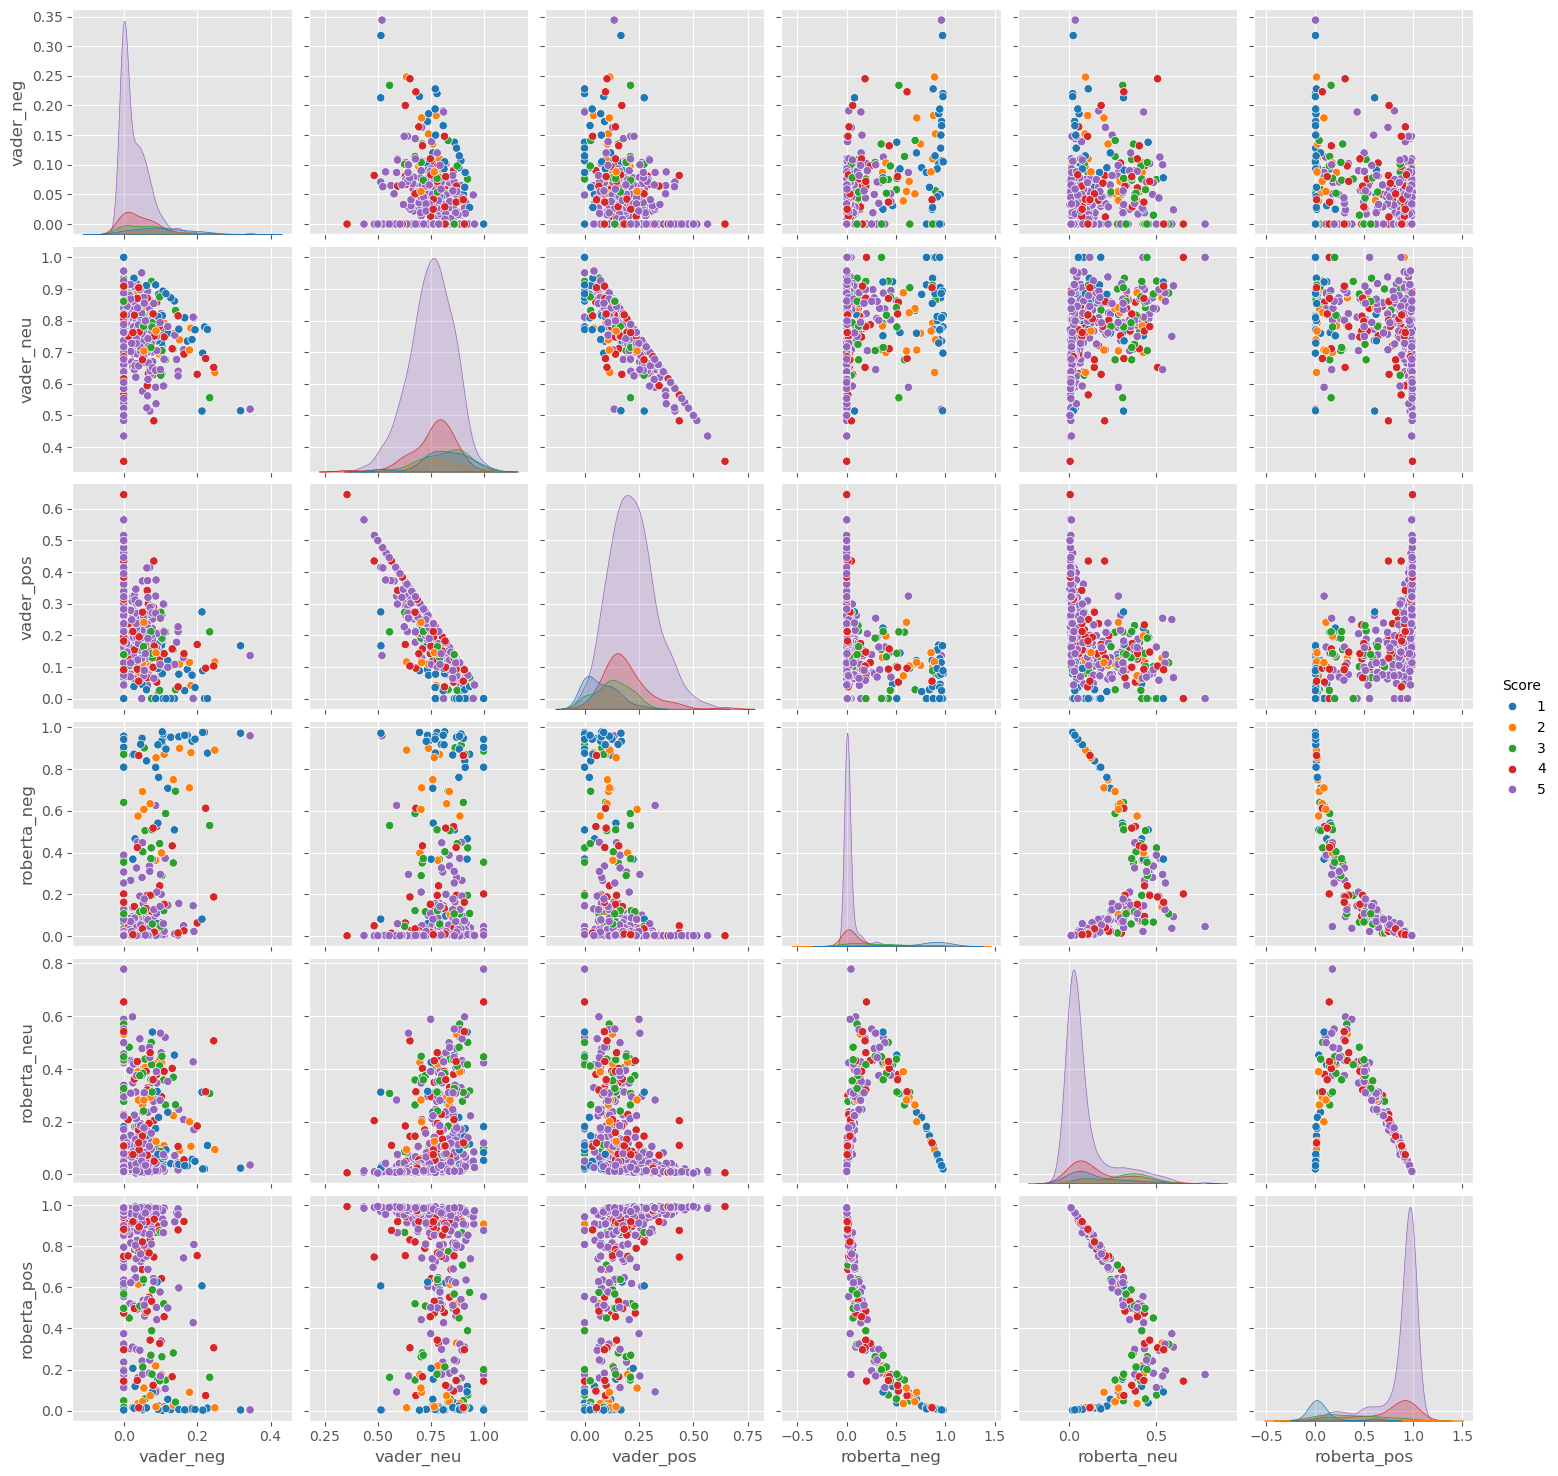

In [49]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [50]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [51]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [52]:
# nevative sentiment 5-Star view

In [53]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [54]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [55]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\ANKIT KUMAR\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ANKIT KUMAR\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not ins

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [56]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [57]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [58]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [ ]:
# Now, let's compare same text over both models with pipeline comparison
!pip install --upgrade pip
!pip install --prefer-binary torch -i https://pypi.org/simple

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# ---------- 1. Data ----------
# Replace with your dataframe of reviews
df = pd.DataFrame({
    "review": [
        "Absolutely loved it!",
        "Worst purchase ever.",
        "It was okay, nothing special.",
        "Fast shipping, but product broke quickly."
    ]
})

# ---------- 2. VADER ----------
sia = SentimentIntensityAnalyzer()
df['vader_compound'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Map to labels for easier comparison
def vader_label(score):
    return 'pos' if score >= 0.05 else ('neg' if score <= -0.05 else 'neu')

df['vader_label'] = df['vader_compound'].apply(vader_label)

# ---------- 3. RoBERTa ----------
roberta = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
roberta_map = {'positive': 'pos', 'negative': 'neg', 'neutral': 'neu'}

roberta_preds = roberta(df['review'].tolist(), truncation=True)
df['roberta_label'] = [roberta_map[p['label'].lower()] for p in roberta_preds]
df['roberta_score'] = [p['score'] for p in roberta_preds]

# ---------- 4. Agreement Table ----------
agreement = pd.crosstab(df['vader_label'], df['roberta_label'], rownames=['VADER'], colnames=['RoBERTa'])
print("\nAgreement Crosstab:\n", agreement)

# ---------- 5. Side-by-Side Sample ----------
print("\nSample Predictions:\n", df[['review','vader_label','vader_compound','roberta_label','roberta_score']])

# ---------- 6. Visual: Score Distributions ----------
fig, ax = plt.subplots(1, 2, figsize=(12,4))
df['vader_compound'].hist(ax=ax[0], bins=10, color='skyblue', edgecolor='black')
ax[0].set_title("VADER Compound Score Distribution")

df['roberta_score'].hist(ax=ax[1], bins=10, color='salmon', edgecolor='black')
ax[1].set_title("RoBERTa Score Distribution")

plt.tight_layout()
plt.show()
